In [1]:
%cd ..

/home/feodor/Jupyter/depth-poset


In [2]:
import os
import subprocess

import numpy as np
import pandas as pd
import pickle as pkl
import networkx as nx
import gudhi as gh

from src.depth import DepthPoset


#from tqdm.notebook import tqdm
from tqdm import tqdm

from matplotlib import pyplot as plt
from matplotlib import cm
from networkx import draw_networkx
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib import lines as mlines
from matplotlib.colors import to_rgb

from src import poset_scores, node_scores

import itertools

# Create directory for the pics

In [3]:
pics_path = 'raports/pics/extended torus scores'

if not os.path.exists(pics_path):
    os.makedirs(pics_path)

# Load and Format the Data

In [4]:
# define file paths
directory = "results/scores-on-barycentric-cubical-toruses-extended"
paths = np.sort([f'{directory}/{f}' for f in os.listdir(directory)])
paths = paths[np.char.find(paths, '.pkl') != -1]


In [5]:
df_sizes = pd.DataFrame({'path': paths})
df_sizes['size'] = df_sizes['path'].apply(lambda path: os.path.getsize(path))

print(f"Total Size is {df_sizes['size'].sum()*1024**-3:.4f} GB.")
print(f"The distribution of sizes:\n{df_sizes['size'].describe()}")

Total Size is 0.0493 GB.
The distribution of sizes:
count    2.760000e+02
mean     1.918239e+05
std      3.853667e+05
min      1.830000e+03
25%      5.301000e+03
50%      9.660000e+03
75%      1.079842e+05
max      1.510149e+06
Name: size, dtype: float64


In [6]:

#paths = paths[pd.Series(paths).apply(lambda s: s.split('.')[0].split('/')[-1]).values > '2024-12-26 18:04:00']

# load them
ls = []
for path in tqdm(paths, total=len(paths)):
    with open(path, 'rb') as file:
        ls.append(pkl.load(file))
        ls[-1].update({'path': path})

100%|██████████| 276/276 [00:02<00:00, 116.67it/s]


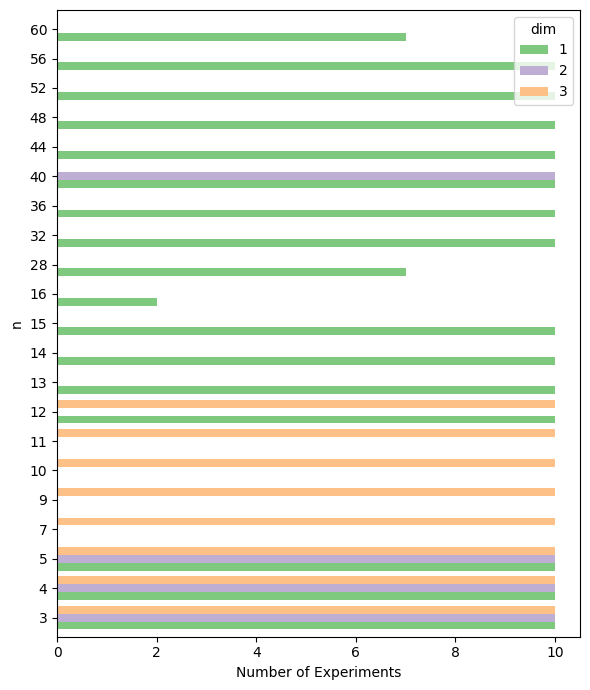

In [7]:
fig, ax = plt.subplots(figsize=(6, 7))

df_cases = pd.DataFrame(ls)
df_cases.insert(0, 'index', df_cases.index)


cmap_categorical = plt.get_cmap('Dark2')
cmap_categorical = plt.get_cmap('Accent')
colors = cmap_categorical(np.arange(df_cases['dim'].nunique()))

df_cases[['n', 'dim', 'depth poset']].groupby(['n', 'dim']).count().reset_index().pivot(columns='dim', index='n', values='depth poset').fillna(0).astype(int).plot(kind='barh', width=0.8, ax=ax, color=colors)
plt.xlabel('Number of Experiments')
plt.tight_layout()
plt.savefig('raports/pics/extended torus scores/cases.png')

In [8]:
print(f'df_cases.shape = {df_cases.shape}')
df_cases.head()

df_cases.shape = (276, 9)


,index,n,dim,shape,complex,depth poset,poset scores,node scores,path
0,0,40,2,"(40, 40)",<src.complexes.CubicalTorusComplexExtended obj...,<src.depth.DepthPoset object at 0x79a240ae1ac0>,"[{'object': 'full', 'cycles_dimension': 488, '...","[{'object': 'full', 'node': (29, 15),((29,15),...",results/scores-on-barycentric-cubical-toruses-...
1,1,40,2,"(40, 40)",<src.complexes.CubicalTorusComplexExtended obj...,<src.depth.DepthPoset object at 0x79a240ae1c40>,"[{'object': 'full', 'cycles_dimension': 549, '...","[{'object': 'full', 'node': (30, 33),((29,29),...",results/scores-on-barycentric-cubical-toruses-...
2,2,40,2,"(40, 40)",<src.complexes.CubicalTorusComplexExtended obj...,<src.depth.DepthPoset object at 0x79a240ae1fa0>,"[{'object': 'full', 'cycles_dimension': 561, '...","[{'object': 'full', 'node': (36, 24),((36,24),...",results/scores-on-barycentric-cubical-toruses-...
3,3,40,2,"(40, 40)",<src.complexes.CubicalTorusComplexExtended obj...,<src.depth.DepthPoset object at 0x79a240ae1b50>,"[{'object': 'full', 'cycles_dimension': 533, '...","[{'object': 'full', 'node': (8, 5),((8,5),(8,6...",results/scores-on-barycentric-cubical-toruses-...
4,4,40,2,"(40, 40)",<src.complexes.CubicalTorusComplexExtended obj...,<src.depth.DepthPoset object at 0x79a240ae2c90>,"[{'object': 'full', 'cycles_dimension': 521, '...","[{'object': 'full', 'node': (34, 1),((34,0),(3...",results/scores-on-barycentric-cubical-toruses-...


### Listing the cases which are not exactly 10 experiments.

In [9]:
df_cases_not10 = df_cases.groupby(['n', 'dim']).agg({'index': 'count', 'path': list}).rename(columns={'index': 'count'})
df_cases_not10 = df_cases_not10[df_cases_not10['count'] != 10] 
df_cases_not10 = df_cases_not10.explode('path').sort_values('path').reset_index()
df_cases_not10

,n,dim,count,path
0,28,1,7,results/scores-on-barycentric-cubical-toruses-...
1,28,1,7,results/scores-on-barycentric-cubical-toruses-...
2,28,1,7,results/scores-on-barycentric-cubical-toruses-...
3,28,1,7,results/scores-on-barycentric-cubical-toruses-...
4,28,1,7,results/scores-on-barycentric-cubical-toruses-...
5,16,1,2,results/scores-on-barycentric-cubical-toruses-...
6,16,1,2,results/scores-on-barycentric-cubical-toruses-...
7,60,1,7,results/scores-on-barycentric-cubical-toruses-...
8,28,1,7,results/scores-on-barycentric-cubical-toruses-...
9,28,1,7,results/scores-on-barycentric-cubical-toruses-...


In [10]:
print('\n'.join(df_cases_not10['path'].apply(lambda s: f'rm "{s}"')))

rm "results/scores-on-barycentric-cubical-toruses-extended/2025-07-15 16:26:58.455878.pkl"
rm "results/scores-on-barycentric-cubical-toruses-extended/2025-07-15 16:26:59.129561.pkl"
rm "results/scores-on-barycentric-cubical-toruses-extended/2025-07-15 16:26:59.156414.pkl"
rm "results/scores-on-barycentric-cubical-toruses-extended/2025-07-15 16:26:59.156477.pkl"
rm "results/scores-on-barycentric-cubical-toruses-extended/2025-07-15 16:26:59.656997.pkl"
rm "results/scores-on-barycentric-cubical-toruses-extended/2025-07-15 16:27:00.413393.pkl"
rm "results/scores-on-barycentric-cubical-toruses-extended/2025-07-15 16:27:00.413599.pkl"
rm "results/scores-on-barycentric-cubical-toruses-extended/2025-07-15 16:27:30.977236.pkl"
rm "results/scores-on-barycentric-cubical-toruses-extended/2025-07-15 16:27:30.977824.pkl"
rm "results/scores-on-barycentric-cubical-toruses-extended/2025-07-15 16:27:30.978436.pkl"
rm "results/scores-on-barycentric-cubical-toruses-extended/2025-07-15 16:27:31.543301.pkl"

# The example of the filtration $f: \mathbb{T}^2\to\mathbb{R}$

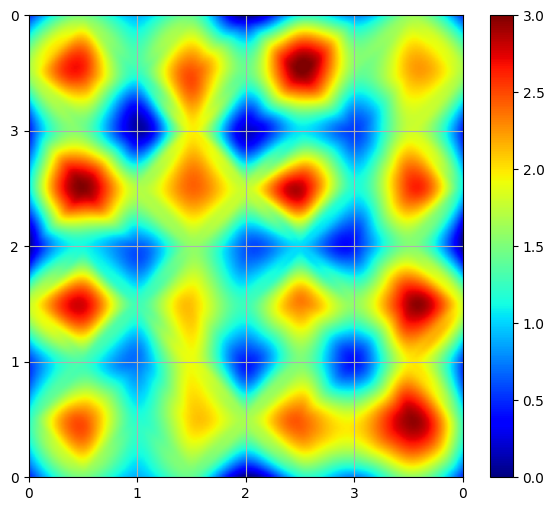

In [11]:
try:
    ctc = np.random.choice(df_cases[(df_cases['dim'] == 2)&(df_cases['n'] <= 6)]['complex'])
except ValueError:
    ctc = np.random.choice(df_cases[(df_cases['dim'] == 2)]['complex'])
    
n = ctc.shape[0]

fig, ax = plt.subplots(figsize=(7, 6))

sm = ctc.draw_gradiental(ax=ax, vmin=0, vmax=3, cmap='jet')
plt.colorbar(sm, ax=ax)

ax.set_xticks(np.arange(n + 1), np.arange(n + 1)%n)
ax.set_yticks(np.arange(n + 1), np.arange(n + 1)%n)
ax.grid(True)

plt.savefig(os.path.join(pics_path, '2d-example.png'))

# Plot Poset Scores

## Define Scores and Objects Distribution

In [12]:
def get_object_reduction(s):
    if s.find('row reduction') == 0:
        return 'row reduction'
    elif s.find('column reduction') == 0:
        return 'column reduction'
    else:
        return 'full'

In [13]:
df_scores = df_cases[['index', 'n', 'dim', 'poset scores']]
df_scores = df_scores.explode('poset scores')
df_scores = pd.concat([df_scores.drop(columns='poset scores'), df_scores['poset scores'].apply(pd.Series)], axis=1)
df_scores['reduction'] = df_scores['object'].apply(get_object_reduction)

print(f'df_scores.shape = {df_scores.shape}')
df_scores.head()

df_scores.shape = (2256, 12)


,index,n,dim,object,cycles_dimension,height,number_of_components,number_of_maximal_nodes,number_of_minimal_nodes,number_of_nodes,number_of_relations,reduction
0,0,40,2,full,488.0,12.0,106.0,252.0,1579.0,3202.0,3584.0,full
0,0,40,2,subposet dim=0,264.0,12.0,42.0,100.0,793.0,1599.0,1821.0,full
0,0,40,2,subposet dim=1,224.0,12.0,62.0,150.0,784.0,1601.0,1763.0,full
0,0,40,2,column reduction,NaN,NaN,592.0,800.0,1932.0,NaN,NaN,column reduction
0,0,40,2,column reduction subposet dim=0,NaN,NaN,423.0,622.0,929.0,NaN,NaN,column reduction


In [14]:
df_scores[df_scores['object'] == 'column reduction']

,index,n,dim,object,cycles_dimension,height,number_of_components,number_of_maximal_nodes,number_of_minimal_nodes,number_of_nodes,number_of_relations,reduction
0,0,40,2,column reduction,NaN,NaN,592.0,800.0,1932.0,NaN,NaN,column reduction
1,1,40,2,column reduction,NaN,NaN,513.0,715.0,1952.0,NaN,NaN,column reduction
2,2,40,2,column reduction,NaN,NaN,528.0,723.0,1896.0,NaN,NaN,column reduction
3,3,40,2,column reduction,NaN,NaN,593.0,793.0,1923.0,NaN,NaN,column reduction
4,4,40,2,column reduction,NaN,NaN,519.0,705.0,1905.0,NaN,NaN,column reduction
...,...,...,...,...,...,...,...,...,...,...,...,...
271,271,60,1,column reduction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,column reduction
272,272,60,1,column reduction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,column reduction
273,273,60,1,column reduction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,column reduction
274,274,60,1,column reduction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,column reduction


In [15]:
df_done_scores = df_scores.groupby(['dim', 'reduction']).count().drop(columns=['index', 'n', 'object']) > 0
df_done_scores = df_done_scores.loc[itertools.product(df_cases['dim'].unique(), ['full', 'row reduction', 'column reduction'])]
df_done_scores

cycles_dimension  height  number_of_components  \
dim reduction                                                          
2   full                          True    True                  True   
    row reduction                False   False                  True   
    column reduction             False   False                  True   
3   full                          True    True                 False   
    row reduction                False   False                 False   
    column reduction             False   False                 False   
1   full                          True    True                 False   
    row reduction                False   False                 False   
    column reduction             False   False                 False   

                      number_of_maximal_nodes  number_of_minimal_nodes  \
dim reduction                                                            
2   full                                 True                     True   
    row reduction                        True                     True   
    column reduction                     True                     True   
3   full                                False                    False   
    row reduction                       False                    False   
    column reduction                    False                    False   
1   full                                False                    False   
    row reduction                       False                    False   
    column reduction                    False                    False   

                      number_of_nodes  number_of_relations  
dim reduction                                               
2   full                         True                 True  
    row reduction               False                False  
    column reduction            False                False  
3   full                         True                 True  
    row reduction               False                False  
    column reduction            False                False  
1   full                         True                 True  
    row reduction               False                False  
    column reduction            False                False

## Plot scores

In [16]:
df_objects_scores = df_done_scores.stack()
df_objects_scores = df_objects_scores[df_objects_scores].index.to_series().reset_index(drop=False).drop(columns=0).rename(columns={'level_2': 'score'})
df_objects_scores = df_objects_scores.sort_values('score').reset_index(drop=True)

print(f'There are {len(df_objects_scores)} score object pairs to plot')
df_objects_scores.head()

There are 21 score object pairs to plot


,dim,reduction,score
0,2,full,cycles_dimension
1,1,full,cycles_dimension
2,3,full,cycles_dimension
3,2,full,height
4,1,full,height


In [17]:
def get_score_path(score, dim, reduction, score_filename_template='score={score}, dim={dim}, object={reduction}.png'):
    # returns path to saved and load a picture about the object
    return os.path.join(pics_path, score_filename_template.format(score=score, dim=dim, reduction=reduction).replace('_', '-'))

<>:44: SyntaxWarning: invalid escape sequence '\m'
<>:44: SyntaxWarning: invalid escape sequence '\;'
<>:44: SyntaxWarning: invalid escape sequence '\m'
<>:44: SyntaxWarning: invalid escape sequence '\;'
/tmp/ipykernel_189610/714668712.py:44: SyntaxWarning: invalid escape sequence '\m'
  plt.suptitle(f"{row['reduction']} poset of $\mathbb{{T\;}}_n^{{{row['dim']}}}$\n{score}")
/tmp/ipykernel_189610/714668712.py:44: SyntaxWarning: invalid escape sequence '\;'
  plt.suptitle(f"{row['reduction']} poset of $\mathbb{{T\;}}_n^{{{row['dim']}}}$\n{score}")
100%|██████████| 21/21 [00:02<00:00,  8.13it/s]


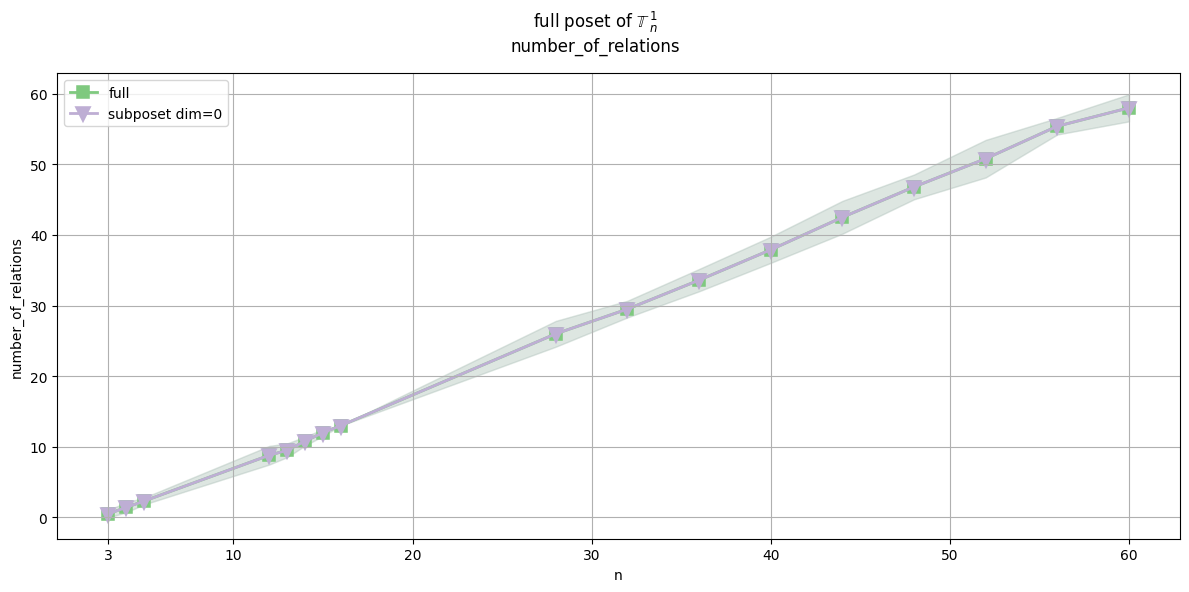

In [18]:
markers = ['s', 'v', '^', 'o', '*']


for i, row in tqdm(df_objects_scores.iterrows(), total=len(df_objects_scores)):
    path = get_score_path(**row)
    
    score = row['score']

    df_score = df_scores[(df_scores['dim'] == row['dim']) & (df_scores['reduction'] == row['reduction'])][['index', 'n', 'object', score]]
    df_score = df_score.pivot_table(index=['n', 'index'], columns='object', values=score).reset_index(drop=False).drop(columns='index')

    df_score_mean = df_score.groupby('n').mean()
    df_score_std = df_score.groupby('n').std()

    colors = cmap_categorical(np.arange(df_score_mean.shape[1]))
    
    fig, ax = plt.subplots(figsize=(12, 6))

    for i_col, col in enumerate(df_score_mean.columns):
        linewidth = 2
        markeredgewidth = 4
        x_mean = df_score_mean.index
        y_mean = df_score_mean[col]
        y_std = df_score_std[col]
        ax.plot(x_mean, y_mean, label=col, color=colors[i_col], marker=markers[i_col], linewidth=linewidth, markeredgewidth=markeredgewidth, zorder=1)
        ax.fill_between(x_mean, y_mean - y_std, y_mean + y_std, color=colors[i_col], alpha=0.2, zorder=0)

    xticks = ax.get_xticks().astype(int)
    xticks = np.concatenate([xticks[(xticks > x_mean.min())&(xticks < x_mean.max())], [x_mean.min(), x_mean.max()]]).astype(int)
    xticks = np.unique(xticks)
    ax.set_xticks(xticks)

    ax.legend()
    ax.set_xlabel('n')    
    ax.set_ylabel(score)
    ax.grid(True)

    plt.savefig(path)

    if i < len(df_objects_scores) - 1:
        plt.close()

#    else:
plt.suptitle(f"{row['reduction']} poset of $\mathbb{{T\;}}_n^{{{row['dim']}}}$\n{score}")
plt.tight_layout()
plt.show()

# Reporting

## Scores

### Scores Description

In [19]:
def latexize_the_score(score):
    return score.replace('_', r'\_')

In [20]:
ltx_scores_description = [
    f"""
    \\item \\textbf{{{latexize_the_score(score)}}} - {getattr(poset_scores, score).__doc__.strip()}
    """.strip()
    for score in df_objects_scores['score'].unique()
]
ltx_scores_description = '\n'.join(ltx_scores_description)
ltx_scores_description = f"""
\\par We have computed the following scores for the objects in the depth poset of the extended barycentric cubical torus:
\\begin{{itemize}}
{ltx_scores_description}
\\end{{itemize}}
""".strip()

print(ltx_scores_description)

\par We have computed the following scores for the objects in the depth poset of the extended barycentric cubical torus:
\begin{itemize}
\item \textbf{cycles\_dimension} - Returns the dimension of space of cycles in reduction.
\item \textbf{height} - Returns the poset height - the length of the longest chain.
\item \textbf{number\_of\_components} - Returns the number of connetcted components in the poset
\item \textbf{number\_of\_maximal\_nodes} - Returns the number of maximal nodes.
\item \textbf{number\_of\_minimal\_nodes} - Returns the number of minimal nodes.
\item \textbf{number\_of\_nodes} - Returns the number of nodes in the poset.
\item \textbf{number\_of\_relations} - Returns the number of relations in the transitive reduction.
\end{itemize}


## Scores Table

In [21]:
def get_score_label(score, dim, reduction, score_label_template='{score}-{reduction}{dim}'):
    # returns label to saved and load a picture about the object
    return 'fig:' + score_label_template.format(score=score, dim=dim, reduction=reduction).replace('_', '').replace(' ', '')

In [22]:
df_done_scores_pics = pd.DataFrame(
    [[f'Fig. \\ref{{{get_score_label(score, dim, reduction)}}}' for score in df_done_scores.columns] for dim, reduction in df_done_scores.index],
    index=df_done_scores.index,
    columns=df_done_scores.columns
)
df_done_scores_pics[~df_done_scores] = np.nan
df_done_scores_pics = df_done_scores_pics.dropna(how='all').fillna('')
df_done_scores_pics.columns = df_done_scores_pics.columns.str.replace('_', r'\_')

df_done_scores_pics = df_done_scores_pics.transpose()

df_done_scores_pics

dim                                                                 2  \
reduction                                                        full   
cycles\_dimension                Fig. \ref{fig:cyclesdimension-full2}   
height                                    Fig. \ref{fig:height-full2}   
number\_of\_components        Fig. \ref{fig:numberofcomponents-full2}   
number\_of\_maximal\_nodes  Fig. \ref{fig:numberofmaximalnodes-full2}   
number\_of\_minimal\_nodes  Fig. \ref{fig:numberofminimalnodes-full2}   
number\_of\_nodes                  Fig. \ref{fig:numberofnodes-full2}   
number\_of\_relations          Fig. \ref{fig:numberofrelations-full2}   

dim                                                                            \
reduction                                                       row reduction   
cycles\_dimension                                                               
height                                                                          
number\_of\_components        Fig. \ref{fig:numberofcomponents-rowreduction2}   
number\_of\_maximal\_nodes  Fig. \ref{fig:numberofmaximalnodes-rowreduction2}   
number\_of\_minimal\_nodes  Fig. \ref{fig:numberofminimalnodes-rowreduction2}   
number\_of\_nodes                                                               
number\_of\_relations                                                           

dim                                                                            \
reduction                                                    column reduction   
cycles\_dimension                                                               
height                                                                          
number\_of\_components      Fig. \ref{fig:numberofcomponents-columnreducti...   
number\_of\_maximal\_nodes  Fig. \ref{fig:numberofmaximalnodes-columnreduc...   
number\_of\_minimal\_nodes  Fig. \ref{fig:numberofminimalnodes-columnreduc...   
number\_of\_nodes                                                               
number\_of\_relations                                                           

dim                                                              3  \
reduction                                                     full   
cycles\_dimension             Fig. \ref{fig:cyclesdimension-full3}   
height                                 Fig. \ref{fig:height-full3}   
number\_of\_components                                               
number\_of\_maximal\_nodes                                           
number\_of\_minimal\_nodes                                           
number\_of\_nodes               Fig. \ref{fig:numberofnodes-full3}   
number\_of\_relations       Fig. \ref{fig:numberofrelations-full3}   

dim                                                              1  
reduction                                                     full  
cycles\_dimension             Fig. \ref{fig:cyclesdimension-full1}  
height                                 Fig. \ref{fig:height-full1}  
number\_of\_components                                              
number\_of\_maximal\_nodes                                          
number\_of\_minimal\_nodes                                          
number\_of\_nodes               Fig. \ref{fig:numberofnodes-full1}  
number\_of\_relations       Fig. \ref{fig:numberofrelations-full1}

In [23]:
ltx_scores_table = f"""
\\par We can see the score values in the following figures:
\\begin{{center}}
{df_done_scores_pics.to_latex()}
\\end{{center}}
""".strip()

print(ltx_scores_table)

\par We can see the score values in the following figures:
\begin{center}
\begin{tabular}{llllll}
\toprule
dim & \multicolumn{3}{r}{2} & 3 & 1 \\
reduction & full & row reduction & column reduction & full & full \\
\midrule
cycles\_dimension & Fig. \ref{fig:cyclesdimension-full2} &  &  & Fig. \ref{fig:cyclesdimension-full3} & Fig. \ref{fig:cyclesdimension-full1} \\
height & Fig. \ref{fig:height-full2} &  &  & Fig. \ref{fig:height-full3} & Fig. \ref{fig:height-full1} \\
number\_of\_components & Fig. \ref{fig:numberofcomponents-full2} & Fig. \ref{fig:numberofcomponents-rowreduction2} & Fig. \ref{fig:numberofcomponents-columnreduction2} &  &  \\
number\_of\_maximal\_nodes & Fig. \ref{fig:numberofmaximalnodes-full2} & Fig. \ref{fig:numberofmaximalnodes-rowreduction2} & Fig. \ref{fig:numberofmaximalnodes-columnreduction2} &  &  \\
number\_of\_minimal\_nodes & Fig. \ref{fig:numberofminimalnodes-full2} & Fig. \ref{fig:numberofminimalnodes-rowreduction2} & Fig. \ref{fig:numberofminimalnodes-co

### Score pics

In [24]:
hspace_width = -0.24
width = 1.4

ltx_score_pics = [
    ' '*4 + f"""
    \\begin{{figure}}[h!]
        \\centering
        \\hspace*{{{hspace_width}\\textwidth}}
        \\includegraphics[width={width}\\textwidth]{{{get_score_path(**row).replace('raports/', '')}}}
        \\caption{{Score {latexize_the_score(row['score'])} values for the {row['reduction']} poset of $\\mathbb{{T}}_n^{{{row['dim']}}}$.}}
        \\label{{{get_score_label(**row)}}}
    \\end{{figure}}
    """.strip() for i, row in df_objects_scores.iterrows()
]

ltx_score_pics = '\n'.join(ltx_score_pics)
print(ltx_score_pics)

    \begin{figure}[h!]
        \centering
        \hspace*{-0.24\textwidth}
        \includegraphics[width=1.4\textwidth]{pics/extended torus scores/score=cycles-dimension, dim=2, object=full.png}
        \caption{Score cycles\_dimension values for the full poset of $\mathbb{T}_n^{2}$.}
        \label{fig:cyclesdimension-full2}
    \end{figure}
    \begin{figure}[h!]
        \centering
        \hspace*{-0.24\textwidth}
        \includegraphics[width=1.4\textwidth]{pics/extended torus scores/score=cycles-dimension, dim=1, object=full.png}
        \caption{Score cycles\_dimension values for the full poset of $\mathbb{T}_n^{1}$.}
        \label{fig:cyclesdimension-full1}
    \end{figure}
    \begin{figure}[h!]
        \centering
        \hspace*{-0.24\textwidth}
        \includegraphics[width=1.4\textwidth]{pics/extended torus scores/score=cycles-dimension, dim=3, object=full.png}
        \caption{Score cycles\_dimension values for the full poset of $\mathbb{T}_n^{3}$.}
        \label{fig

## Cases distribution

In [25]:
ltx_cases = r"""
\par The distribution of computed cases by size and dimension we can see in the Fig. \ref{fig:cases-distribution}.
\begin{figure}[h!]
    \centering
    \includegraphics[width=1.0\textwidth]{pics/extended torus scores/cases.png}
    \caption{The distribution of computed cases by size and dimension}
    \label{fig:cases-distribution}
\end{figure}
""".strip()

## Load texts

In [26]:
# load texts, describing the process
with open('texts/barycentric-cubical-torus - model.txt', 'r') as file:
    ltx_model = file.read()

with open('texts/barycentric-cubical-torus - model extension.txt', 'r') as file:
    ltx_model_ext = file.read()

# load LaTeX template
with open('texts/template.tex', 'r') as file:
    ltx_latex = file.read()

In [27]:
body = f"""
\\section{{Model}}
{ltx_model}
{ltx_model_ext}
{ltx_cases}

\\section{{Poset Scores}}
\\subsection{{Scores Description}}
{ltx_scores_description}
\\subsection{{Scores}}
{ltx_scores_table}
{ltx_score_pics}
"""


raport = ltx_latex.replace('BODY', body)
print(raport)

\documentclass{article}
\usepackage{amsfonts} 
\usepackage{amsmath}
\usepackage{hyperref}
\usepackage{graphicx}
\usepackage{subcaption}
\usepackage{booktabs}
\usepackage{makecell}
\usepackage{multirow}
%\usepackage{placeins}

\begin{document}


\section{Model}
\par The $d$ dimensional torus $\mathbb{T}^d$ can be defined as $\left(\mathbb{R}/n\mathbb{Z}\right)^d$ for some natural $n$. And we can represent this as a cell-complex with cubical $d$-dimensional cells $\left(\mathbb{Z}/n\mathbb{Z}\right)^d + [0, 1]^d$ and all their $k$-faces for $k=0, ..., d$.
\par We randomly assume the filtration value for each $k$-face uniformly distributed in $[k, k+1]$. This filtration on segmented torus will corespond some real filtration $f: mathbb{T}^d\to\mathbb{R}$, s.t. the $d$-dimensional cells will corespond the local maximums, vertices will corespond the local minimums and other $k$-faces will be saddles.
\begin{figure}[h!]
    \centering
    \includegraphics[width=0.6\textwidth]{pics/torus score

In [28]:
with open('raports/barycentric-torus-extended-scores.tex', 'w') as file:
    file.write(raport)

In [29]:
os.chdir('raports')
result = subprocess.run(
    ['pdflatex', 'barycentric-torus-extended-scores.tex'],
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE,
    text=True  # или encoding='utf-8'
)
os.chdir('..')